### 학습목표
- 데이터 수집(Crawling) 방법에 대해서 알 수 있다.
- 웹페이지의 구조에 대해서 알 수 있다.
- 컴퓨터를 통하여 웹페이지의 정보를 주고 받을 수 있다. (requests 라이브러리)

##### 통신의 기초 : 요청, 응답
- Client : 페이지의 정보를 요청(requests)하는 PC (사용자의 컴퓨터)
- Server : 페이지의 정보를 응답(response), 제공하는 PC (페이지의 정보를 제공하는 컴퓨터)

##### requests 라이브러리
- 웹페이지의 정보,데이터를 요청/응답 받기위한 라이브러리
- 웹브라우저의 역할을 대신함 (왜? 우리는 코드를 통해서 데이터를 받아오기 때문)

In [1]:
# 라이브러리 불러오기
import requests as req

In [3]:
# requests 라이브러리를 통하여 페이지 정보 받아오기
# url : 웹페이지의 표준 주소 -> 문자열로 작성하기!
url = 'https://www.naver.com/'
res = req.get(url)
res
# Response [200]: 성공! 페이지의 정보를 잘 입력받아 응답했습니다~
# Response [400]: 문제발생!! -> Client단에서 문제가 발생했을경우 출력됨 (요청, request 과정에서 문제가 발생)
# Response [500]: 문제발생!! -> Server단에서 문제가 발생했을경우 출력됨 (응답, response 과정에서 문제가 발생)

<Response [200]>

In [5]:
# 페이지의 정보(요소) 확인하기!
res.text
# 앞으로 태그정보를 통해 컴퓨터와 소통하여 원하는 정보를 추출
# 이때! 출력된 결과는 '문자열' 형태 이므로 컴퓨터와 소통하기 위하여 html 언어 형태로 변경

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

우리가 확인해야할 문제
- res.text -> 결과 -> 데이터타입 -> '문자열' -> html 태그화
- 변환작업: 문자열 -> html 문서화 (파싱, parsing)
- beautifulsoup라이브러리를 활용하여 응답받은 문자열을 html 형태로 변환

In [6]:
# 라이브러리 불러오기
from bs4 import BeautifulSoup as bs

In [7]:
!pip install lxml

In [9]:
# bs(변경할 데이터, 파싱방법)
soup = bs(res.text, 'lxml')
soup

<!DOCTYPE html>
<html class="fzoom" lang="ko"> <head> <meta charset="utf-8"/> <meta content="origin" name="Referrer"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <title>NAVER</title> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양

- 네이버 페이지에서 "동명동 맛집" 검색 후에 페이지 정보 받아오기
  - html 형태로 변경하여 준비 (변수명에 2 붙어서 사용)

<!DOCTYPE html>
<html lang="ko"><head> <meta charset="utf-8"/> <meta content="strict-origin-when-cross-origin" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="동명동 맛집 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'동명동 맛집'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'동명동 맛집'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>동명동 맛집 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_260108a.css?o=search" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/search/pc/css/search2_251211.css?o=search" rel
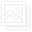
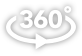
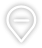
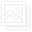
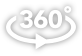
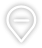

In [13]:
url2 = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91&ackey=ytjh2sat'
res2 = req.get(url2)
soup2 = bs(res2.text, 'lxml')
soup2

In [15]:
# soup2 가 가지고 있는 페이지 정보에서 "블로그" 키워드 추출
# soup2 에게 요청~ " 블로그 글자를 저에게 주세요~" -> "태그 정보"를 전달
# soup2.select("태그정보")
soup2.select("a")
# 현재 페이지에 있는 모든 a태그를 추출 -> 명확한 데이터수집을 위해서 다른 태그들과 구분 (제한)
# 모든 태그를 추출하기때문에 -> 결과가 "리스트" 형태로 출력

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew2 ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"> <i class="spnew2 ico_keyboard">한글 입력기</i> <div class="guide_text">입력도구</div> </a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew2 ico_arrow">자동완성 레이어</i><div class="guide_text">검색 레이어</div></a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>,
 <a aria-selected="false" class="tab" href="?s

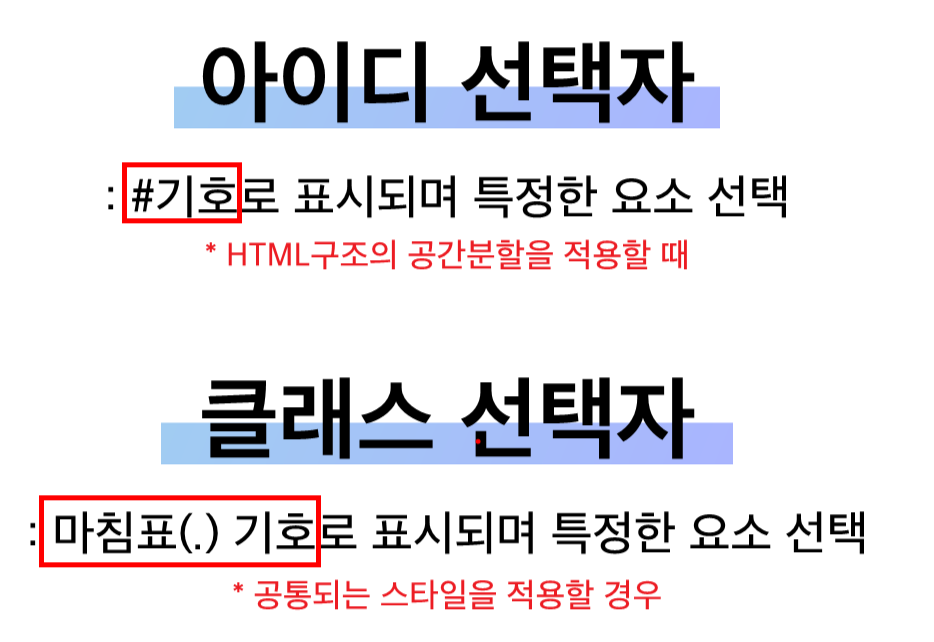

In [17]:
# 내가 원하는 데이터만 추출하기 위해서 제한을두자!! -> 선택자
elements = soup2.select('a.tab') # 클래스 이름이 'tab' 인 a태그를 추출
# select -> 조건에 해당하는 모들 요소를 추출 -> 리스트 형태로 출력
elements

[<a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.cafe.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*c.jmp&amp;r=2&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_cafe"></i>카페</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.image.all&amp;where=image&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*i.jmp&amp;r=3&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_image"></i>이미지</a>,
 <a aria-selected="false" class="tab" href="?ssc=tab.kin.kqna&amp;where=kin&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%E

In [19]:
# 해당하는 모든 태그 -> 인덱싱을 통해 원하는 태그를 추출(요소) -> 순수한 콘텐츠 추출 (요소.text)
elements[0].text

'블로그'

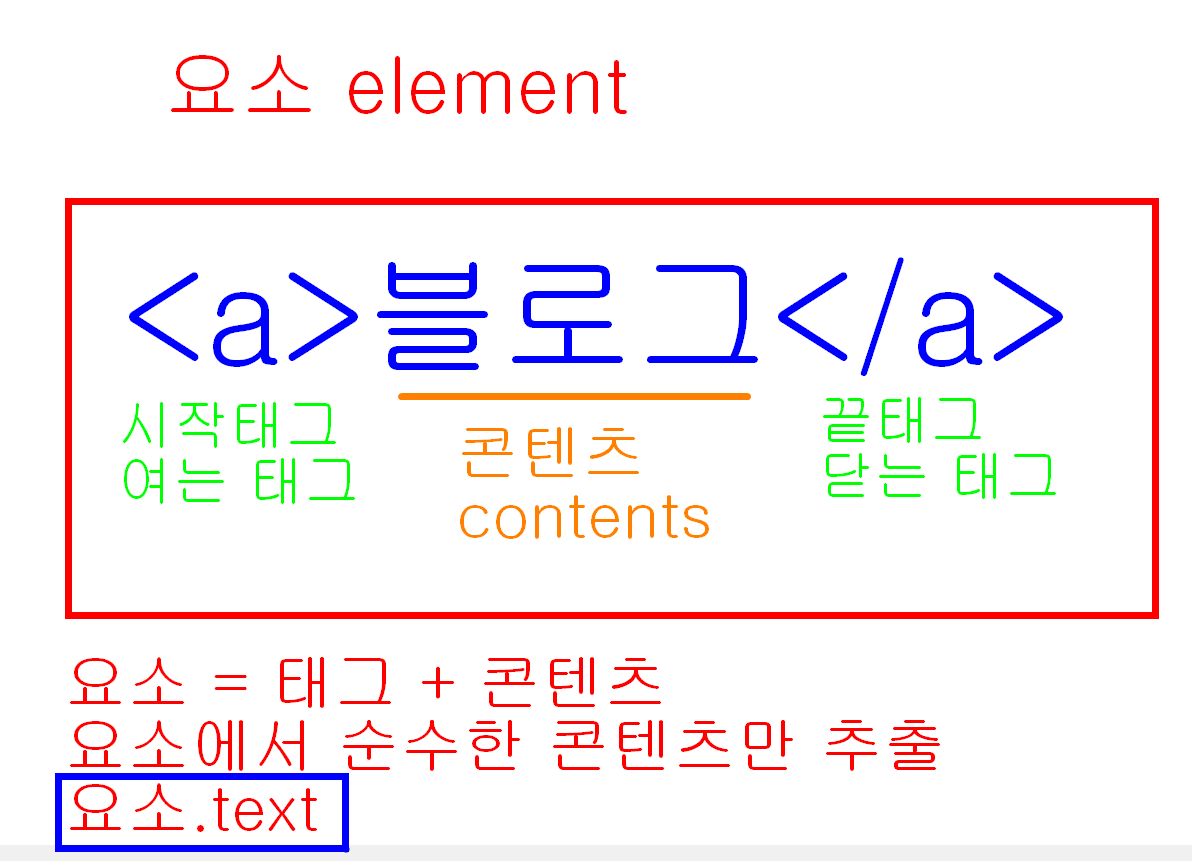

In [20]:
# soup.select('태그정보') -> 조건에 해당하는 모든 요소를 추출
# soup.select_one('태그정보) -> 조건에 해당하는 요소중 최상단의 요소만 출력 -> 요소형태로 출력
soup2.select_one('a.tab')

<a aria-selected="false" class="tab" href="?ssc=tab.blog.all&amp;sm=tab_jum&amp;query=%EB%8F%99%EB%AA%85%EB%8F%99+%EB%A7%9B%EC%A7%91" onclick="return goOtherCR(this,'a=tab*b.jmp&amp;r=1&amp;i=&amp;u='+urlencode(this.href));" role="tab"><i class="spnew2 ico_nav_blog"></i>블로그</a>

In [21]:
# 인덱싱 불필요 -> ID 선택자로 구성되어있는 요소를 추출할때 사용
soup2.select_one('a.tab').text

'블로그'

In [23]:
# 블로그, 카페, 이미지, 지식IN
a_tab = soup2.select('a.tab')
for a in a_tab:
    print(a.text)

블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
숏텐츠
어학사전
지도
도서
지식백과
학술정보
전체
블로그
카페
이미지
지식iN
인플루언서
동영상
쇼핑
뉴스
숏텐츠
어학사전
지도
도서
지식백과
학술정보


### 실습
- 네이버 날씨 페이지에서 "현재온도" 추출하기~

In [27]:
# url
url3 = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%82%A0%EC%94%A8&ackey=mi8mqi3g'
# 페이지 정보 요청 및 응답
res3 = req.get(url3)
# html 언어로 변경
soup3 = bs(res3.text,'lxml')
# 현재온도 데이터 추출 -> 콘텐츠 추출
soup3.select_one('div.temperature_text>strong').text

'현재 온도2.2°'

In [30]:
soup3.select('div.temperature_text>strong')[1].text

'예측 온도-6°'

### 실습2
- 네이버 페이지에서 '삼성전자 주식' 키워드 검색 후 뉴스 제목 수집

In [34]:
url4 = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%82%BC%EC%84%B1%EC%A0%84%EC%9E%90+%EC%A3%BC%EC%8B%9D&ackey=7l0zevi0'
res4 = req.get(url4)
soup4 = bs(res4.text, 'lxml')

In [38]:
new_title = soup4.select('span.sds-comps-text.sds-comps-text-ellipsis.sds-comps-text-ellipsis-1.sds-comps-text-type-headline1')
# 하나의 태그에 여러개의 클래스를 적용할수 있음!! -> 웹페이지상 띄어쓰기 후 작성
# select 내의 문자열에서는 띄어쓰기가 "자손선택자"
# 클래스 이름에 띄어쓰기가 있다면 -> 띄어쓰기를 마침표(.)로 대체하기!!!

In [39]:
# new_title 내의 콘텐츠 추출
for title in new_title:
    print(title.text)

삼성전자, 홍라희 2조 주식 처분에 1%대 하락
홍라희, 삼성전자 주식 1천500만주 처분…약 2조원 규모
홍라희, 삼성전자 주식 1500만주 처분…약 2조 원 규모
홍라희, 삼성전자 주식 1,500만주 처분…약 2조원 규모
경영정보 공시 - 삼성전자
삼성전자 - 다음금융
삼성전자 주식 1년 뒤에 오늘보다 오른다? 떨어진다?
삼성전자 주가, 성과급과 동탄 집값
삼성전자 주식 2조원 규모 매도하는 이유는(상속세 및 대출금)
이러다 진짜 삼성전자 주식 2배 레버리지 ETF 나오나?
마지막 상속세! 홍라희 관장 삼성전자 주식 1500만 주 매각 완료
홍라희 여사 삼성전자 주식 대량 매도, 주가에 악재일까 기회일까?
[총정리] 삼성전자 홍라희 상속세 논쟁 삼성전자 주식 1,500만 주 처분 상속세 부담이 부른 2조원 매각
삼성전자 - 종목테마 홈
Samsung Electronics Co Ltd 오늘의 주가 | 005930 실시간 티커
삼성전자(005930)의 실시간 주가를 확인해보세요
